In [1]:
import estimators
import utils

import seaborn as sn
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

plt.rcParams.update(utils.get_plt_settings())

save=True


# Brüser

- berücksichtigt nur die Intervallschätzungen, deren qSQI > 0.4 ist
- informativ falls Coverage auf Segment >= 50%, bzw. 75% oder 100% liegt

### q_th = 0.4,  coverage_threshold = 75 %

F1-Score: 0.32

 Testset insgesamt
Fehler < 5 FE   : 32.61 %
Fehler < 10 FE   : 43.21 %
Fehler < 15 FE   : 51.64 %
Fehler < 20 FE   : 59.38 %
Fehler = 667 FE : 0.09578 %
                 precision    recall  f1-score   support

non-informative       0.61      0.95      0.74    144049
    informative       0.75      0.21      0.32    109654

       accuracy                           0.63    253703
      macro avg       0.68      0.58      0.53    253703
   weighted avg       0.67      0.63      0.56    253703

MAE insgesamt:  21.85 +- 30.48
MAE auf als informativ klassifizierten Segmenten: 9.57 +- 15.61
MAE auf als informativ annotierten Segmenten:  3.28 +- 2.66
MSE auf als informativ klassifizierten Segmenten: 335.45
MSE auf als informativ annotierten Segmenten:  17.83
MSE insgesamt:  1406.50


Coverage klassifiziert      : 11.78 %
Coverage annotiert          : 43.22 %

 Coverage bestimmter Fehler des genutzten Signals auf Gesamtsignal
Fehler < 5 FE gesamt           : 32.61 %
Fehler < 

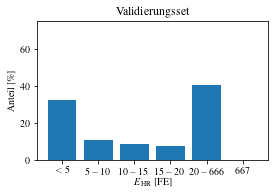

<Figure size 297.644x183.958 with 0 Axes>

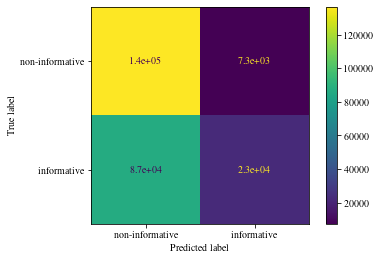

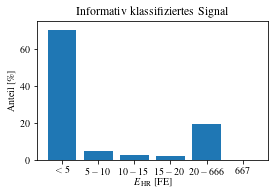

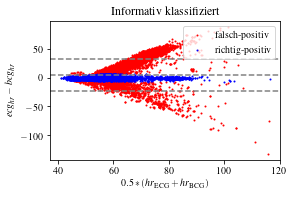

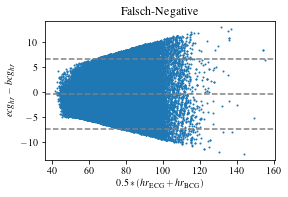

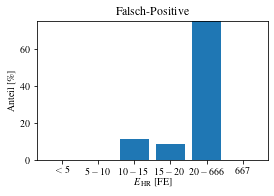

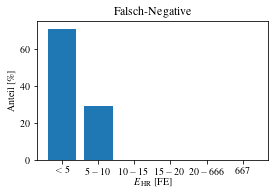

In [2]:
brueser = estimators.BrueserSingleSQI()
brueser.print_model_test_report("brueser04")

print("\n Alle Daten")
predicted = brueser.predict_all_labels()
labels = brueser.target
coverage = len(predicted[predicted])/len(predicted.index)*100
coverage_annotated = len(labels[labels])/len(labels.index)*100
# print("Fehler auf als informativ klassifizierten Segmenten: %.2f" % brueser.get_mean_error(brueser.target.index, predicted))
# print("Fehler auf als informativ annotierten Segmenten:  %.2f" % brueser.get_mean_error(brueser.target.index, brueser.target))
print("Informative Segmente nach Brueser: %.2f" % coverage)
print("Informative Segmente nach Annotation: %.2f" % coverage_annotated)

### q_{th} = 0.4, coverage_threshold = 50 %

F1-Score: 0.45

 Testset insgesamt
Fehler < 5 FE   : 32.61 %
Fehler < 10 FE   : 43.21 %
Fehler < 15 FE   : 51.64 %
Fehler < 20 FE   : 59.38 %
Fehler = 667 FE : 0.09578 %
                 precision    recall  f1-score   support

non-informative       0.64      0.89      0.74    144049
    informative       0.69      0.34      0.45    109654

       accuracy                           0.65    253703
      macro avg       0.66      0.61      0.60    253703
   weighted avg       0.66      0.65      0.62    253703

MAE insgesamt:  21.85 +- 30.48
MAE auf als informativ klassifizierten Segmenten: 12.30 +- 18.99
MAE auf als informativ annotierten Segmenten:  3.28 +- 2.66
MSE auf als informativ klassifizierten Segmenten: 511.99
MSE auf als informativ annotierten Segmenten:  17.83
MSE insgesamt:  1406.50


Coverage klassifiziert      : 20.95 %
Coverage annotiert          : 43.22 %

 Coverage bestimmter Fehler des genutzten Signals auf Gesamtsignal
Fehler < 5 FE gesamt           : 32.61 %
Fehler <

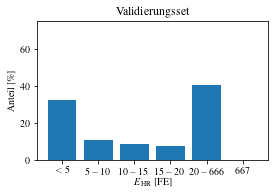

<Figure size 297.644x183.958 with 0 Axes>

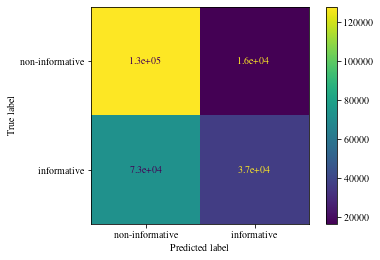

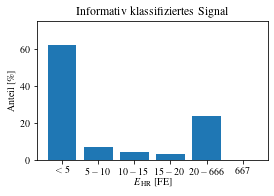

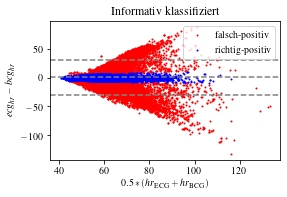

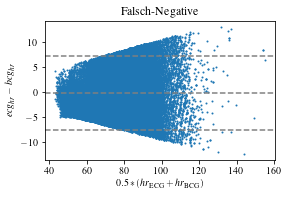

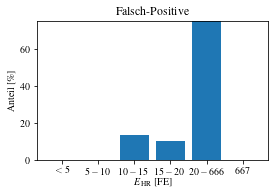

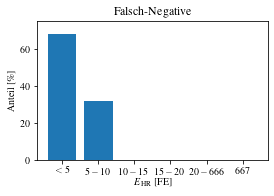

In [3]:
brueser = estimators.BrueserSingleSQI(coverage_threshold=50)


brueser.print_model_test_report()

print("\n Alle Daten")
predicted = brueser.predict_all_labels()
labels = brueser.target
coverage = len(predicted[predicted])/len(predicted.index)*100
coverage_annotated = len(labels[labels])/len(labels.index)*100
# print("Fehler auf als informativ klassifizierten Segmenten: %.2f" % brueser.get_mean_error(brueser.target.index, predicted))
# print("Fehler auf als informativ annotierten Segmenten:  %.2f" % brueser.get_mean_error(brueser.target.index, brueser.target))
print("Informative Segmente nach Brueser: %.2f" % coverage)
print("Informative Segmente nach Annotation: %.2f" % coverage_annotated)

### q_th = 0.4,  coverage_threshold = 100 %

F1-Score: 0.17

 Testset insgesamt
Fehler < 5 FE   : 32.61 %
Fehler < 10 FE   : 43.21 %
Fehler < 15 FE   : 51.64 %
Fehler < 20 FE   : 59.38 %
Fehler = 667 FE : 0.09578 %
                 precision    recall  f1-score   support

non-informative       0.59      0.98      0.73    144049
    informative       0.77      0.09      0.17    109654

       accuracy                           0.60    253703
      macro avg       0.68      0.54      0.45    253703
   weighted avg       0.66      0.60      0.49    253703

MAE insgesamt:  21.85 +- 30.48
MAE auf als informativ klassifizierten Segmenten: 8.77 +- 14.25
MAE auf als informativ annotierten Segmenten:  3.28 +- 2.66
MSE auf als informativ klassifizierten Segmenten: 279.99
MSE auf als informativ annotierten Segmenten:  17.83
MSE insgesamt:  1406.50


Coverage klassifiziert      : 5.26 %
Coverage annotiert          : 43.22 %

 Coverage bestimmter Fehler des genutzten Signals auf Gesamtsignal
Fehler < 5 FE gesamt           : 32.61 %
Fehler < 5

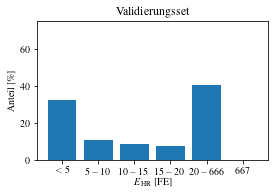

<Figure size 297.644x183.958 with 0 Axes>

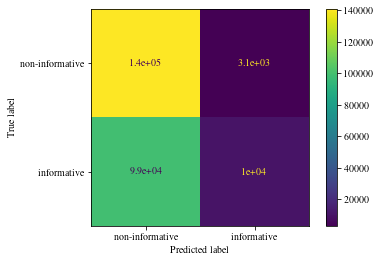

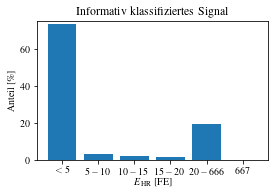

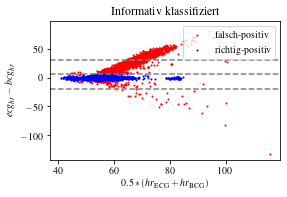

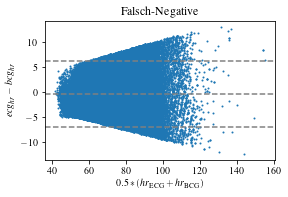

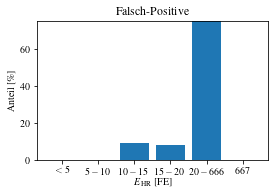

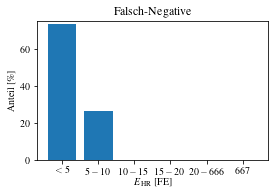

In [4]:
brueser = estimators.BrueserSingleSQI(coverage_threshold=100)
brueser.print_model_test_report()

print("\n Alle Daten")
predicted = brueser.predict_all_labels()
labels = brueser.target
coverage = len(predicted[predicted])/len(predicted.index)*100
coverage_annotated = len(labels[labels])/len(labels.index)*100
# print("Fehler auf als informativ klassifizierten Segmenten: %.2f" % brueser.get_mean_error(brueser.target.index, predicted))
# print("Fehler auf als informativ annotierten Segmenten:  %.2f" % brueser.get_mean_error(brueser.target.index, brueser.target))
print("Informative Segmente nach Brueser: %.2f" % coverage)
print("Informative Segmente nach Annotation: %.2f" % coverage_annotated)

### q_th = 0.3, c_th = 75

F1-Score: 0.53

 Testset insgesamt
Fehler < 5 FE   : 32.61 %
Fehler < 10 FE   : 43.21 %
Fehler < 15 FE   : 51.64 %
Fehler < 20 FE   : 59.38 %
Fehler = 667 FE : 0.09578 %
                 precision    recall  f1-score   support

non-informative       0.65      0.71      0.68    144049
    informative       0.56      0.49      0.53    109654

       accuracy                           0.62    253703
      macro avg       0.61      0.60      0.60    253703
   weighted avg       0.61      0.62      0.61    253703

MAE insgesamt:  21.85 +- 30.48
MAE auf als informativ klassifizierten Segmenten: 17.97 +- 23.31
MAE auf als informativ annotierten Segmenten:  3.28 +- 2.66
MSE auf als informativ klassifizierten Segmenten: 866.44
MSE auf als informativ annotierten Segmenten:  17.83
MSE insgesamt:  1406.50


Coverage klassifiziert      : 37.87 %
Coverage annotiert          : 43.22 %

 Coverage bestimmter Fehler des genutzten Signals auf Gesamtsignal
Fehler < 5 FE gesamt           : 32.61 %
Fehler <

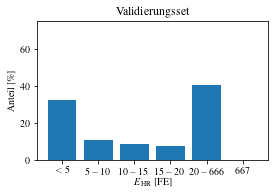

<Figure size 297.644x183.958 with 0 Axes>

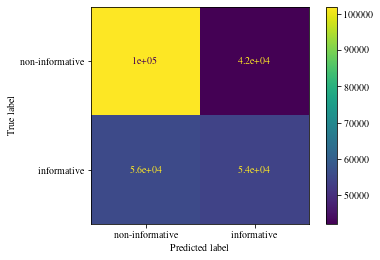

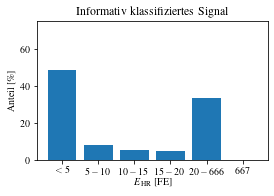

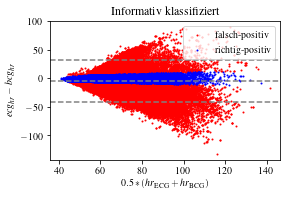

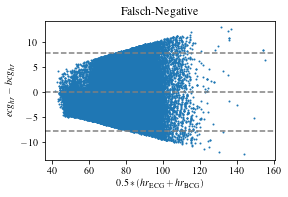

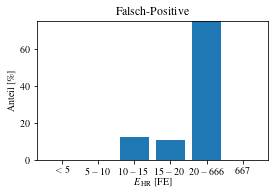

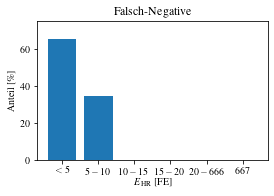

In [5]:
brueser = estimators.BrueserSingleSQI(sqi_threshold=0.3)
brueser.print_model_test_report("brueser03")

print("\n Alle Daten")
predicted = brueser.predict_all_labels()
labels = brueser.target
coverage = len(predicted[predicted])/len(predicted.index)*100
coverage_annotated = len(labels[labels])/len(labels.index)*100
# print("Fehler auf als informativ klassifizierten Segmenten: %.2f" % brueser.get_mean_error(brueser.target.index, predicted))
# print("Fehler auf als informativ annotierten Segmenten:  %.2f" % brueser.get_mean_error(brueser.target.index, brueser.target))
print("Informative Segmente nach Brueser: %.2f" % coverage)
print("Informative Segmente nach Annotation: %.2f" % coverage_annotated)

### q_th=0.3, c_th=50

F1-Score: 0.56

 Testset insgesamt
Fehler < 5 FE   : 32.61 %
Fehler < 10 FE   : 43.21 %
Fehler < 15 FE   : 51.64 %
Fehler < 20 FE   : 59.38 %
Fehler = 667 FE : 0.09578 %
                 precision    recall  f1-score   support

non-informative       0.65      0.47      0.54    144049
    informative       0.49      0.66      0.56    109654

       accuracy                           0.55    253703
      macro avg       0.57      0.57      0.55    253703
   weighted avg       0.58      0.55      0.55    253703

MAE insgesamt:  21.85 +- 30.48
MAE auf als informativ klassifizierten Segmenten: 21.36 +- 24.92
MAE auf als informativ annotierten Segmenten:  3.28 +- 2.66
MSE auf als informativ klassifizierten Segmenten: 1077.27
MSE auf als informativ annotierten Segmenten:  17.83
MSE insgesamt:  1406.50


Coverage klassifiziert      : 58.73 %
Coverage annotiert          : 43.22 %

 Coverage bestimmter Fehler des genutzten Signals auf Gesamtsignal
Fehler < 5 FE gesamt           : 32.61 %
Fehler 

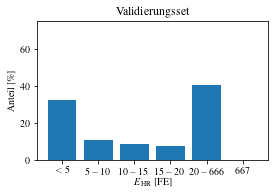

<Figure size 297.644x183.958 with 0 Axes>

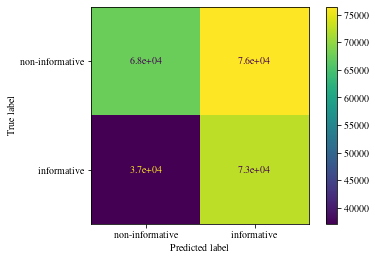

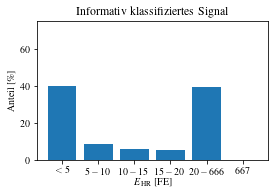

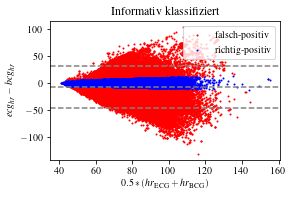

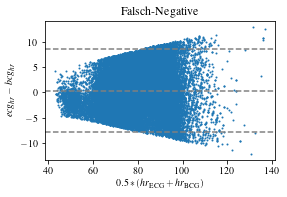

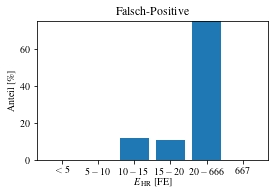

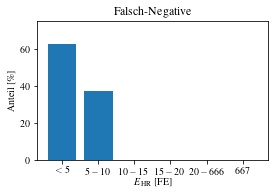

In [6]:
brueser = estimators.BrueserSingleSQI(sqi_threshold=0.3, coverage_threshold=50)
brueser.print_model_test_report()

print("\n Alle Daten")
predicted = brueser.predict_all_labels()
labels = brueser.target
coverage = len(predicted[predicted])/len(predicted.index)*100
coverage_annotated = len(labels[labels])/len(labels.index)*100
# print("Fehler auf als informativ klassifizierten Segmenten: %.2f" % brueser.get_mean_error(brueser.target.index, predicted))
# print("Fehler auf als informativ annotierten Segmenten:  %.2f" % brueser.get_mean_error(brueser.target.index, brueser.target))
print("Informative Segmente nach Brueser: %.2f" % coverage)
print("Informative Segmente nach Annotation: %.2f" % coverage_annotated)

### q_th=0.3, c_th=100

F1-Score: 0.40

 Testset insgesamt
Fehler < 5 FE   : 32.61 %
Fehler < 10 FE   : 43.21 %
Fehler < 15 FE   : 51.64 %
Fehler < 20 FE   : 59.38 %
Fehler = 667 FE : 0.09578 %
                 precision    recall  f1-score   support

non-informative       0.62      0.88      0.73    144049
    informative       0.65      0.29      0.40    109654

       accuracy                           0.63    253703
      macro avg       0.64      0.59      0.57    253703
   weighted avg       0.63      0.63      0.59    253703

MAE insgesamt:  21.85 +- 30.48
MAE auf als informativ klassifizierten Segmenten: 13.45 +- 19.56
MAE auf als informativ annotierten Segmenten:  3.28 +- 2.66
MSE auf als informativ klassifizierten Segmenten: 563.21
MSE auf als informativ annotierten Segmenten:  17.83
MSE insgesamt:  1406.50


Coverage klassifiziert      : 19.25 %
Coverage annotiert          : 43.22 %

 Coverage bestimmter Fehler des genutzten Signals auf Gesamtsignal
Fehler < 5 FE gesamt           : 32.61 %
Fehler <

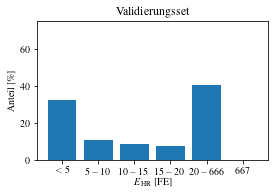

<Figure size 297.644x183.958 with 0 Axes>

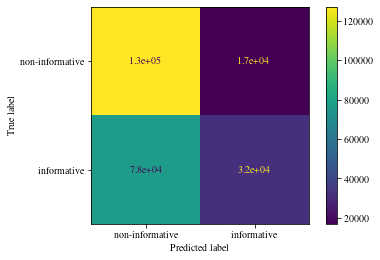

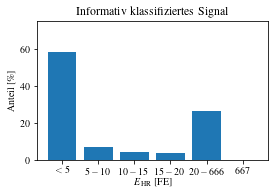

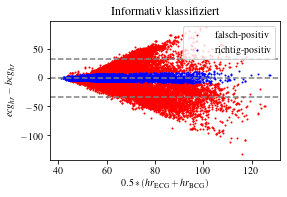

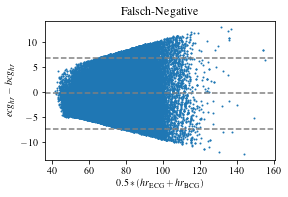

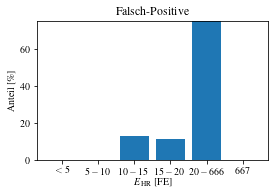

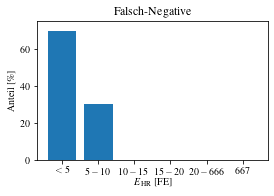

In [7]:
brueser = estimators.BrueserSingleSQI(sqi_threshold=0.3, coverage_threshold=100)
brueser.print_model_test_report()

print("\n Alle Daten")
predicted = brueser.predict_all_labels()
labels = brueser.target
coverage = len(predicted[predicted])/len(predicted.index)*100
coverage_annotated = len(labels[labels])/len(labels.index)*100
# print("Fehler auf als informativ klassifizierten Segmenten: %.2f" % brueser.get_mean_error(brueser.target.index, predicted))
# print("Fehler auf als informativ annotierten Segmenten:  %.2f" % brueser.get_mean_error(brueser.target.index, brueser.target))
print("Informative Segmente nach Brueser: %.2f" % coverage)
print("Informative Segmente nach Annotation: %.2f" % coverage_annotated)

### q_th = 0.2

F1-Score: 0.60

 Testset insgesamt
Fehler < 5 FE   : 32.61 %
Fehler < 10 FE   : 43.21 %
Fehler < 15 FE   : 51.64 %
Fehler < 20 FE   : 59.38 %
Fehler = 667 FE : 0.09578 %
                 precision    recall  f1-score   support

non-informative       0.61      0.04      0.07    144049
    informative       0.43      0.97      0.60    109654

       accuracy                           0.44    253703
      macro avg       0.52      0.50      0.34    253703
   weighted avg       0.53      0.44      0.30    253703

MAE insgesamt:  21.85 +- 30.48
MAE auf als informativ klassifizierten Segmenten: 21.39 +- 23.26
MAE auf als informativ annotierten Segmenten:  3.28 +- 2.66
MSE auf als informativ klassifizierten Segmenten: 998.48
MSE auf als informativ annotierten Segmenten:  17.83
MSE insgesamt:  1406.50


Coverage klassifiziert      : 96.43 %
Coverage annotiert          : 43.22 %

 Coverage bestimmter Fehler des genutzten Signals auf Gesamtsignal
Fehler < 5 FE gesamt           : 32.61 %
Fehler <

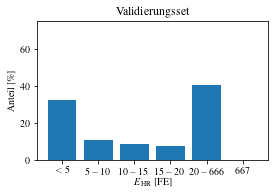

<Figure size 297.644x183.958 with 0 Axes>

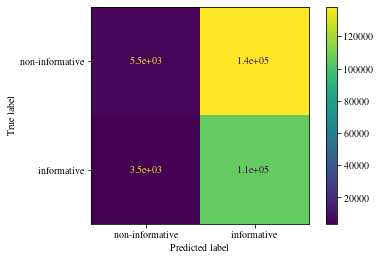

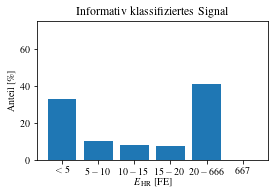

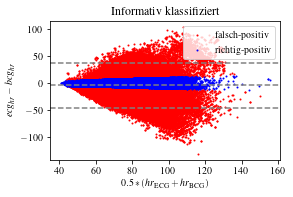

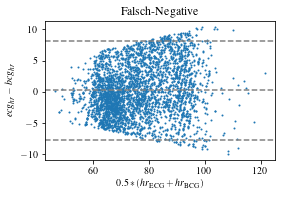

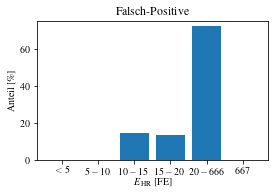

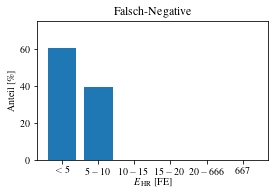

In [8]:
brueser = estimators.BrueserSingleSQI(sqi_threshold=0.2)
brueser.print_model_test_report()

print("\n Alle Daten")
predicted = brueser.predict_all_labels()
labels = brueser.target
coverage = len(predicted[predicted])/len(predicted.index)*100
coverage_annotated = len(labels[labels])/len(labels.index)*100
# print("Fehler auf als informativ klassifizierten Segmenten: %.2f" % brueser.get_mean_error(brueser.target.index, predicted))
# print("Fehler auf als informativ annotierten Segmenten:  %.2f" % brueser.get_mean_error(brueser.target.index, brueser.target))
print("Informative Segmente nach Brueser: %.2f" % coverage)
print("Informative Segmente nach Annotation: %.2f" % coverage_annotated)